In [ ]:
General programming
Input -> m/c -> output

Vs

ML
Input + Output -> m/c ->Algorithm

1984: input: pm of india  answer:    --->m/c <-- Q
                                          |_____ Q - 2025

 [personA] ---- 100 books about - list of dog's + 5more books
                ----------//data                 //more data
    |
    |_____Q: ......


1. Supervised ML - labelled data - regression ; classification

2. Unsupervised ML - unlabelled data - cluster,association 

3. Reinforcement - agent

Train the model 
 - training phase - tech the model how to make predictions
 - test/evaluate the model
    |
   trained data + <unseen data>

 [Apple Orange ] -> ML  ---->  ?  --> don't know  -->Good
                               |
                              Banana (input)

[Apple Orange ] -> ML  ---->  ?  --> Orange  --> Not-Good - re-train
                               |
                              Banana (input)

[Apple Orange ] -> ML  ---->  ?  --> Apple  -->Good
                               |
                              Apple (input)

[Apple Orange ] -> ML  ---->  ?  --> Orange  -->Good
                               |
                             Orange (input)

Deploy the model 
 - after validation model
|
Monitor and maintain the model 
 |
model performance - to get more accurate result 

2000 --> Supermarket software ->billing process ( VB + msaccess)
           - customer ->product ->Cost * Qtr 
           - available stores 
|
2022 + AI
       ---
        |-> product - features 
             pen 
              suggestion 
        |-> shop <------------->House
                    distance
    - get the alogrithm + load our customdata (additional data - 5more books)
        (100Books)                                excel;csv;json;text ->vector (1011) ->vectorstore
       vectorstore+embedding into existing model

regression - prediction

input data  - X - independent variable
output data - Y - dependent (or) target variable 

150    |      .
100    | .
 50    |----------.--
         10  15   25

y=mx+c
  | | |___
  | input(independent variable)
  |
slope

b0 b1 - coefficient - accuracy of predicted value

split the data - independent / dependent variables 
|
train/test <== training 80% - test ->20%
|
fit the model (ML-model) Linearregression
|
predict the result
|
evaluate score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
# product info
X = np.array([[1000],[1500],[2000],[2500]]) # product cost 
Y = np.array([150,250,300,350]) # product sales count

obj = LinearRegression()
obj.fit(X,Y)

X_test = np.array([[3000]]) # make predictions

predicted_sales_count = obj.predict(X_test)
print(f"product predicted sales count value:{predicted_sales_count}")

product predicted sales count value:[425.]


In [5]:
X_test = np.array([[1250]]) # make predictions

predicted_sales_count = obj.predict(X_test)
print(f"product predicted sales count value:{predicted_sales_count}")

product predicted sales count value:[197.5]


product predicted sales count value:[425.]


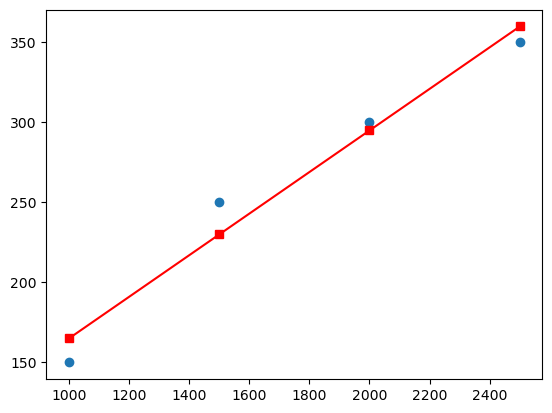

In [27]:
# product info
X = np.array([[1000],[1500],[2000],[2500]]) # product cost 
Y = np.array([150,250,300,350]) # product sales count

obj = LinearRegression()
obj.fit(X,Y)

X_test = np.array([[3000]]) # make predictions

predicted_sales_count = obj.predict(X_test)
print(f"product predicted sales count value:{predicted_sales_count}")

plt.scatter(X,Y) # actual data
plt.plot(X,obj.predict(X),color='red',marker='s') # regression line

In [31]:
from scipy import stats

X = [1000,1500,2000,2500] # product cost 
Y = [150,250,300,350]  # product sales count

stats.linregress(X,Y)

LinregressResult(slope=0.13, intercept=35.0, rvalue=0.9827076298239907, pvalue=0.01729237017600926, stderr=0.017320508075688794, intercept_stderr=31.819805153394675)

In [33]:
# y = mx+c
slope,intercept,r,p,stderr = stats.linregress(X,Y)

In [35]:
def fx(x):
    return slope * x + intercept  # mx+c 

model = []

for var in X:
    r = fx(var)
    model.append(r)

print(model)

[165.0, 230.0, 295.0, 360.0]


In [37]:
fx(3000)

425.0

In [39]:
fx(1250)

197.5

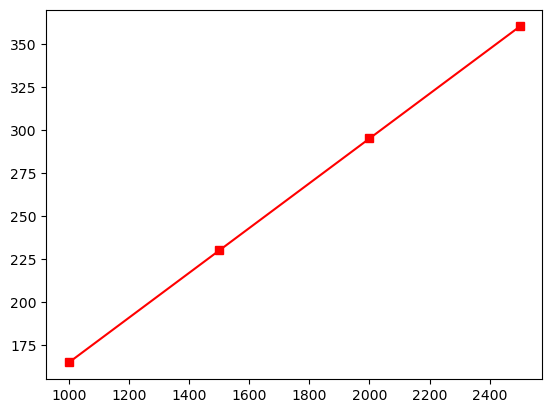

In [41]:
plt.plot(X,model,color='red',marker='s')

In [55]:
import seaborn as sns
#help(sns.load_dataset)
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [59]:
iris_df = sns.load_dataset('iris')
iris = iris_df[['petal_length','petal_width']]

In [61]:
X = iris ['petal_length']
Y = iris ['petal_width']

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=24)

In [67]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(y_test).reshape(-1,1)

In [69]:
from sklearn.linear_model import LinearRegression
obj = LinearRegression()
obj.fit(x_train,y_train)
y_pre_train = obj.predict(x_train)

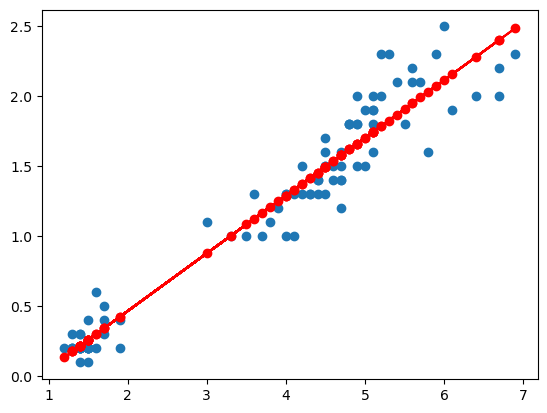

In [71]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pre_train,color='r',marker='o')

In [73]:
# evaluation
# R2 Score

# R2  - How much variance in the target variable
#              Sum of squares of residuals (errors)
#     R2 = 1 -  ---------------------------------
#                    total no.of squares

# result => 1.0 perfect prediction 
#           0.5 - 0-9 -> Good fit 
#           0.0 - 0.4 - retrain the model 

from sklearn.metrics import r2_score
r2_score(y_train,y_pre_train)

0.9365729397395005

In [75]:
from sklearn.linear_model import LinearRegression
obj = LinearRegression()
obj.fit(x_train,y_train)
m = obj.intercept_
c = obj.coef_
print("m=",m,"c=",c)

m= -0.3571937188921539 c= [0.41230693]


In [77]:
def fx(x):         # logic about  obj.predict(x_train) ->y_pred_train 
    return m*x+c     

L=[]
for var in x_train:
    r = fx(var)
    L.append(r)

In [79]:
L

[array([-1.08790669]),
 array([-1.26650355]),
 array([-0.15920302]),
 array([-1.55225853]),
 array([-1.33794229]),
 array([-0.05204491]),
 array([-1.08790669]),
 array([-1.98089099]),
 array([-0.9450292]),
 array([-0.65927423]),
 array([-1.5879779]),
 array([-1.01646795]),
 array([-0.26636114]),
 array([-0.26636114]),
 array([-0.12348365]),
 array([-1.62369727]),
 array([-1.40938104]),
 array([-1.05218732]),
 array([-1.23078418]),
 array([-1.33794229]),
 array([-1.40938104]),
 array([-0.19492239]),
 array([-1.33794229]),
 array([-0.76643234]),
 array([-0.08776428]),
 array([-1.01646795]),
 array([-1.05218732]),
 array([-1.26650355]),
 array([-1.19506481]),
 array([-0.12348365]),
 array([-1.19506481]),
 array([-1.15934544]),
 array([-0.12348365]),
 array([-1.26650355]),
 array([-1.19506481]),
 array([-1.23078418]),
 array([-0.05204491]),
 array([-1.19506481]),
 array([-0.12348365]),
 array([-1.30222292]),
 array([-0.08776428]),
 array([-0.05204491]),
 array([-1.40938104]),
 array([-1.76

In [ ]:
outlier
---------
[100,200,300,400,50,600,700]
             ---
[10,20,30,800,50,60]
          ---

zscore
--------
x = individual data point
u = mean of the data point
a = standard deviation of the data set
      x - u
z =   ------
         a

z +ve
z -ve 
z - above value 2 (or) depending on the threshold

In [81]:
d = np.array([50,60,70,80,90])
mean = np.mean(d)
std_dev = np.std(d)
zscore = (d-mean)/std_dev
zscore

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [83]:
d = np.array([50,60,70,800,90])
mean = np.mean(d)
std_dev = np.std(d)
zscore = (d-mean)/std_dev
zscore

array([-0.55915734, -0.52506238, -0.49096742,  1.99796465, -0.4227775 ])

In [85]:
outliers = d[np.abs(zscore) >1.99]
outliers

array([800])

<Axes: >

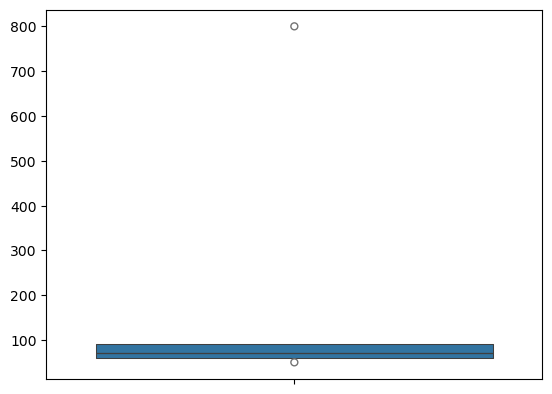

In [89]:
sns.boxenplot(data=d)

<Axes: >

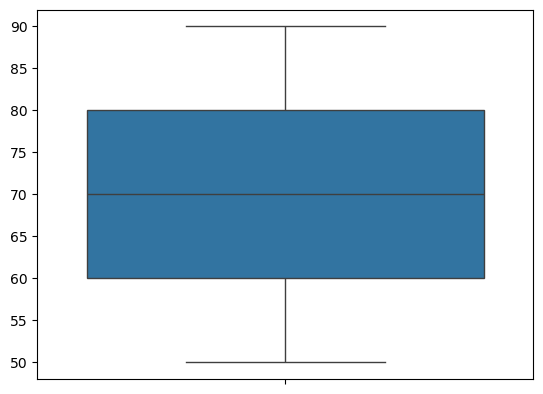

In [91]:
d = np.array([50,60,70,80,90])
mean = np.mean(d)
std_dev = np.std(d)
zscore = (d-mean)/std_dev
zscore
sns.boxplot(data=d)

In [ ]:
# ploynomial regression
# choose the degree 
# fit 
# evalue
# y=b0+b1x+b2x..

r= [ 1.        1.296875  1.59375   1.890625  2.1875    2.484375  2.78125
  3.078125  3.375     3.671875  3.96875   4.265625  4.5625    4.859375
  5.15625   5.453125  5.75      6.046875  6.34375   6.640625  6.9375
  7.234375  7.53125   7.828125  8.125     8.421875  8.71875   9.015625
  9.3125    9.609375  9.90625  10.203125 10.5      10.796875 11.09375
 11.390625 11.6875   11.984375 12.28125  12.578125 12.875    13.171875
 13.46875  13.765625 14.0625   14.359375 14.65625  14.953125 15.25
 15.546875 15.84375  16.140625 16.4375   16.734375 17.03125  17.328125
 17.625    17.921875 18.21875  18.515625 18.8125   19.109375 19.40625
 19.703125 20.      ]


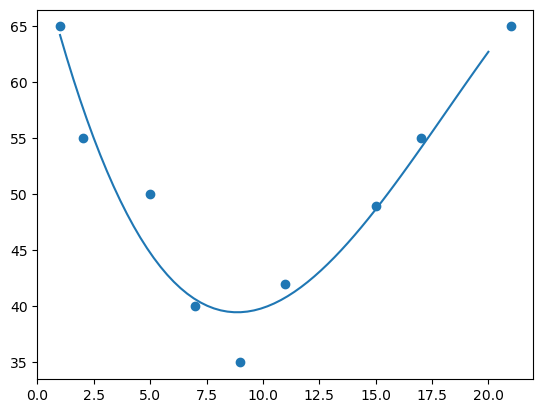

In [101]:
x=[1,2,5,7,9,11,15,17,21]
y=[65,55,50,40,35,42,49,55,65]
model = np.poly1d(np.polyfit(x,y,3)) # x = 2 -> x0 ->1 ; x1 ->2 ; x2 ->4 ; x3 ->2*2*2 ->8
r=np.linspace(1,20,65) # linspace(start,stop,number)
print("r=",r)
plt.scatter(x,y)
plt.plot(r,model(r))

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [105]:
df_sal = pd.read_csv('Position_Salaries.csv')
df_sal.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


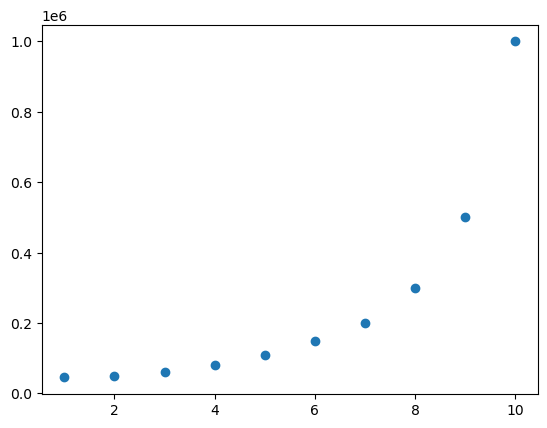

In [107]:
plt.scatter(df_sal['Level'],df_sal['Salary'])

In [109]:
# split data
X = df_sal.iloc[:,1:-1].values
Y = df_sal.iloc[:,-1].values

In [113]:
# Linear Regression
Lr = LinearRegression()
Lr.fit(X,Y)

LinearRegression()

In [115]:
pr = PolynomialFeatures(degree=4)
X_poly = pr.fit_transform(X)
Lr2 = LinearRegression()
Lr2.fit(X_poly,Y)

LinearRegression()

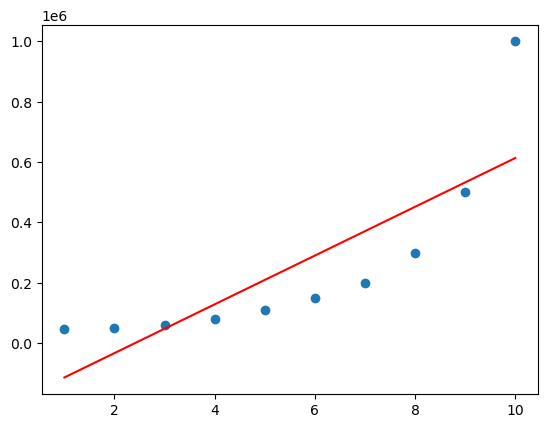

In [121]:
y_pred_lr = Lr.predict(X) # linear regression
y_pred_poly = Lr2.predict(X_poly) # polynomial regression

plt.scatter(X,Y)
plt.plot(X,Lr.predict(X),c='r')


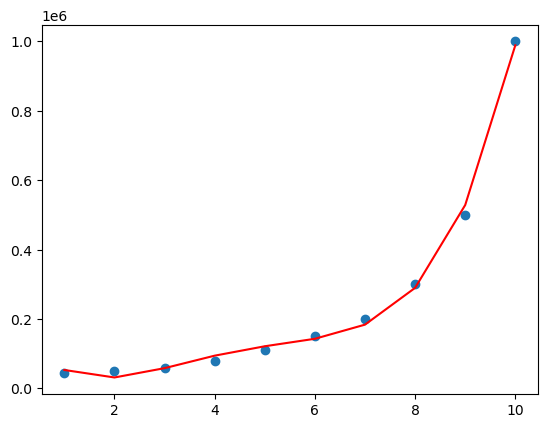

In [125]:
plt.scatter(X,Y)
plt.plot(X,Lr2.predict(X_poly),color='red')

In [127]:
import networkx as nx
import matplotlib.pyplot as plt

# 1st create Graph object         =>  Gobj  = nx.Graph()
# 2nd add edges from set of nodes => Gobj.add_edges_from([(),(),()])
#  ....
# finally - display  => nx.draw(Gobj) Vs nx.draw_networkx(Gobj)

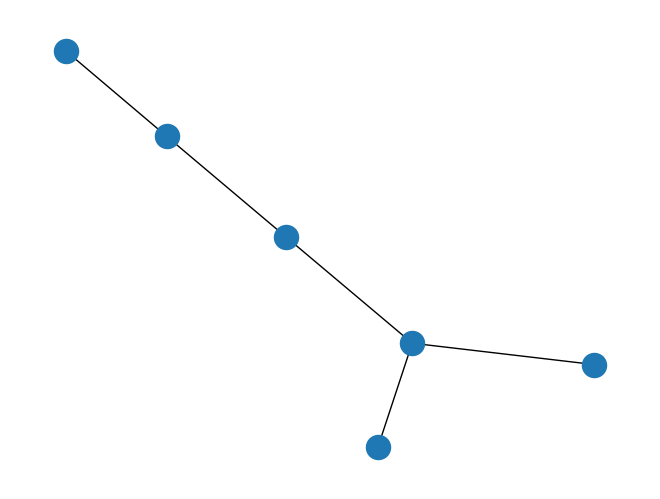

In [131]:
Gobj = nx.Graph()
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw(Gobj)

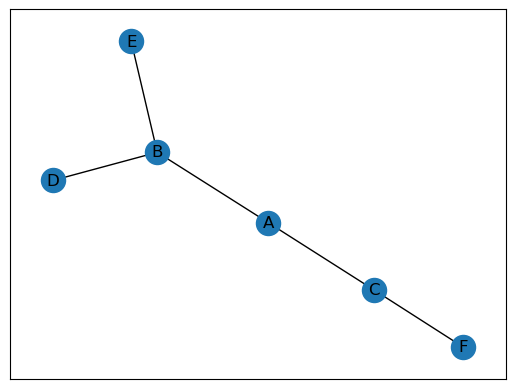

In [133]:
Gobj = nx.Graph()
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw_networkx(Gobj)

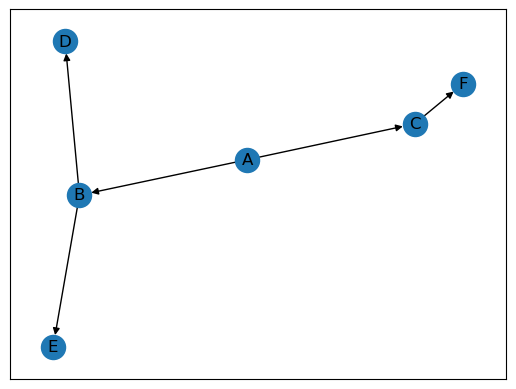

In [135]:
Gobj = nx.DiGraph() # Directed Graph
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw_networkx(Gobj)

In [139]:
G1 = nx.Graph()
G1.add_edges_from([(1,2),(2,3),(3,1)])
nx.is_connected(G1)

True

In [145]:
G2 = nx.Graph()
G2.add_edges_from([(1,2),(2,3),(3,1),(4,5)])
nx.is_connected(G2)

False

In [ ]:
To create weigthed graph 
 [node1] <-------<Weight>---------> [node2]
               |->edge attributes

In [171]:
G = nx.Graph()
G.add_edge(1,2,weight=10)
G.add_edge(2,3,weight=15)
weights = nx.get_edge_attributes(G,'weight')
print(weights)

{(1, 2): 10, (2, 3): 15}


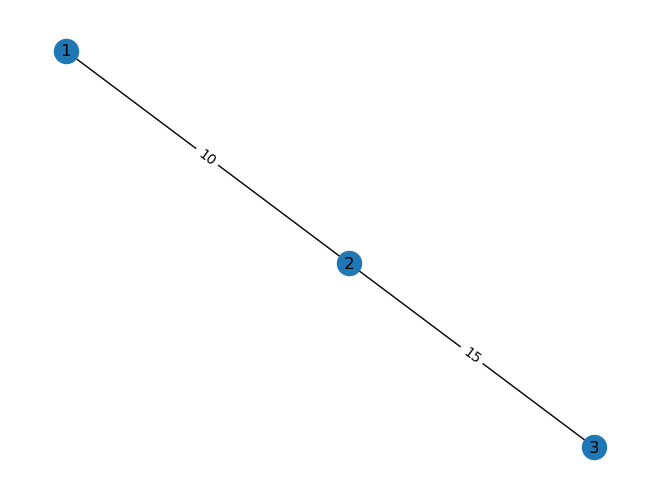

In [169]:
G[1][2]['color']='green' # adding edge attributes
colors = nx.get_edge_attributes(G,'color')
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights)
plt.show()

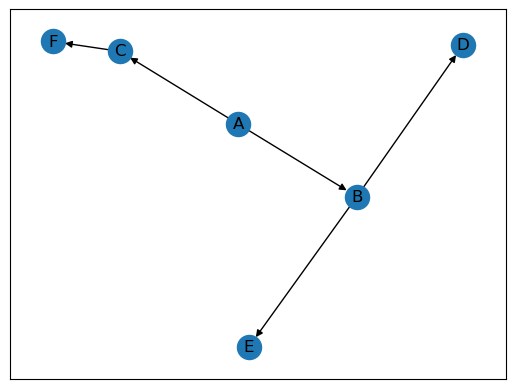

In [173]:
Gobj = nx.DiGraph() # Directed Graph
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw_networkx(Gobj)

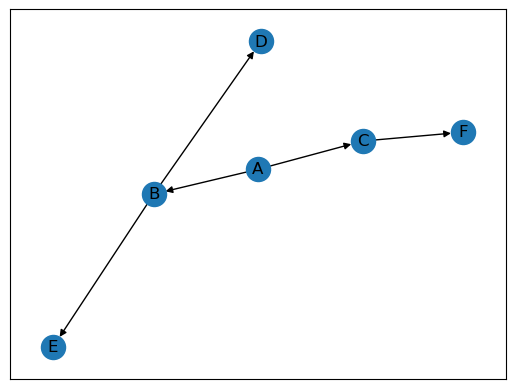

In [175]:
Gobj = nx.DiGraph() # Directed Graph
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw_networkx(Gobj)

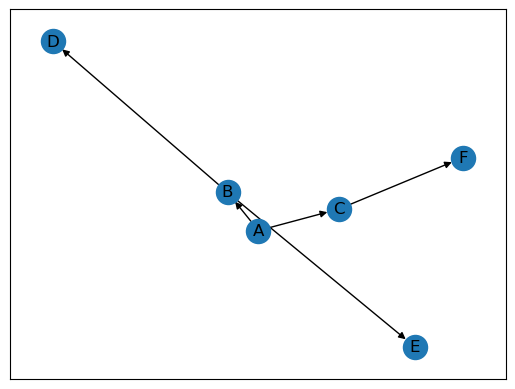

In [179]:
Gobj = nx.DiGraph() # Directed Graph
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw_networkx(Gobj,pos=nx.spring_layout(Gobj,seed=0))

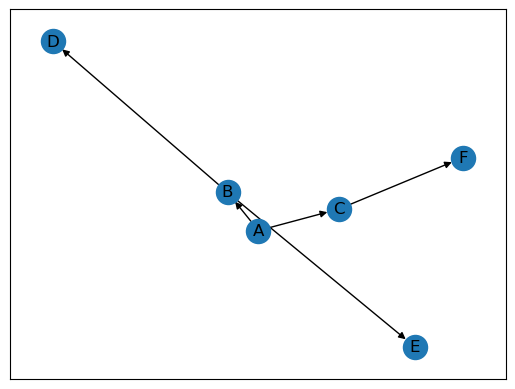

In [181]:
Gobj = nx.DiGraph() # Directed Graph
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw_networkx(Gobj,pos=nx.spring_layout(Gobj,seed=0))

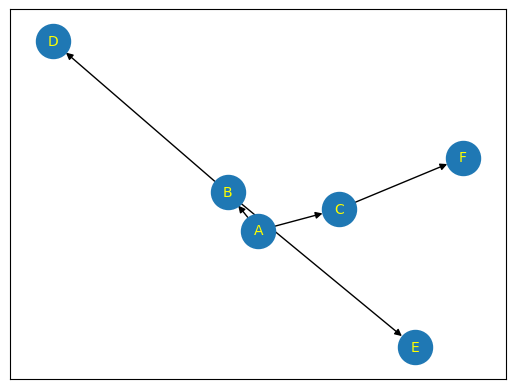

In [193]:
Gobj = nx.DiGraph() # Directed Graph
Gobj.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F')])
nx.draw_networkx(Gobj,pos=nx.spring_layout(Gobj,seed=0),node_size=600,font_size=10,font_color='yellow')

{('A', 'B'): Text(-0.0006736890616168599, 0.019902235845012606, '10'),
 ('A', 'C'): Text(0.023609100273693253, -0.7037328829692673, '20'),
 ('B', 'D'): Text(-0.02360910027369325, 0.7037328829692668, '30')}

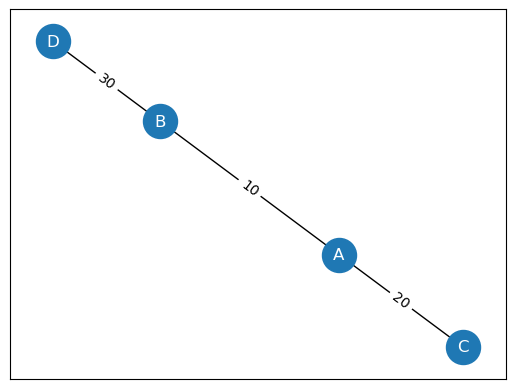

In [209]:
WGobj = nx.Graph()

L=[('A','B',{'weight': 10}),('A','C',{'weight':20}),('B','D',{'weight':30})]
WGobj.add_edges_from(L)
labels = nx.get_edge_attributes(WGobj,'weight')

nx.draw_networkx(WGobj,pos=nx.spring_layout(WGobj,seed=0),node_size=600,font_size=12,font_color='white')
nx.draw_networkx_edge_labels(WGobj,pos=nx.spring_layout(WGobj,seed=0),edge_labels=labels)

{('A', 'B'): Text(0.0972660951466324, -0.05577539664040915, '10'),
 ('A', 'C'): Text(-0.4590570629052718, -0.6334569713728038, '20'),
 ('B', 'D'): Text(0.4590570629052718, 0.6334569713728038, '30')}

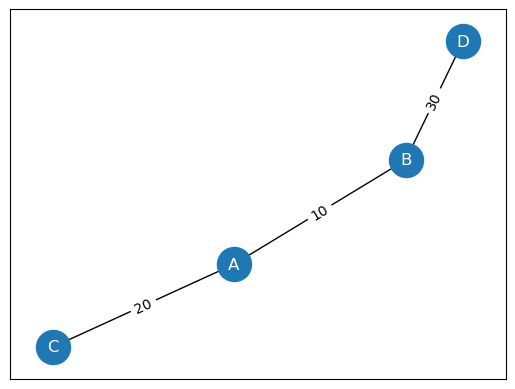

In [217]:
WGobj = nx.Graph()

L=[('A','B',{'Km': 10}),('A','C',{'Km':20}),('B','D',{'Km':30})]
WGobj.add_edges_from(L)
labels = nx.get_edge_attributes(WGobj,'Km')

nx.draw_networkx(WGobj,pos=nx.spring_layout(WGobj,seed=0),node_size=600,font_size=12,font_color='white')
nx.draw_networkx_edge_labels(WGobj,pos=nx.spring_layout(WGobj,seed=0),edge_labels=labels)

{('A', 'B'): Text(-0.0006736890616168599, 0.019902235845012606, '10'),
 ('A', 'C'): Text(0.023609100273693253, -0.7037328829692673, '20'),
 ('B', 'D'): Text(-0.02360910027369325, 0.7037328829692668, '30')}

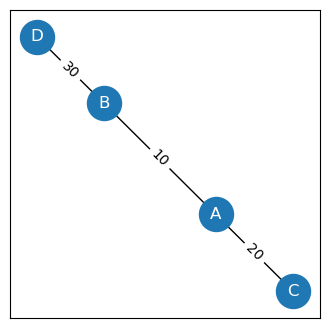

In [223]:
plt.figure(figsize=(4,4))
WGobj = nx.Graph()

L=[('A','B',{'weight': 10}),('A','C',{'weight':20}),('B','D',{'weight':30})]
WGobj.add_edges_from(L)
labels = nx.get_edge_attributes(WGobj,'weight')

nx.draw_networkx(WGobj,pos=nx.spring_layout(WGobj,seed=0),node_size=600,font_size=12,font_color='white')
nx.draw_networkx_edge_labels(WGobj,pos=nx.spring_layout(WGobj,seed=0),edge_labels=labels)

G1 is connected :True
G2 is connected :False



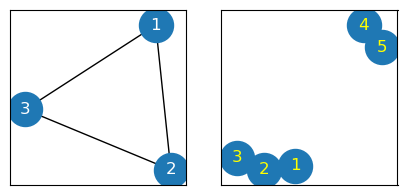

In [233]:
G1 = nx.Graph()
G1.add_edges_from([(1,2),(2,3),(3,1)])
print(f'G1 is connected :{nx.is_connected(G1)}')

G2 = nx.Graph()
G2.add_edges_from([(1,2),(2,3),(4,5)])
print(f'G2 is connected :{nx.is_connected(G2)}')
print('') # empty line

plt.figure(figsize=(5,5))
plt.subplot(221)
nx.draw_networkx(G1,pos=nx.spring_layout(G1,seed=0),node_size=600,font_size=12,font_color='white')

plt.subplot(222)
nx.draw_networkx(G2,pos=nx.spring_layout(G2,seed=0),node_size=600,font_size=12,font_color='yellow')


In [ ]:
# create undirected graph 
# GraphObj.degree['Node']

# create directed graph nx.DiGraph()
# GraphObj.in_degree['Node']
# GraphObj.out_degree['Node']

True
degree of node (A): 2


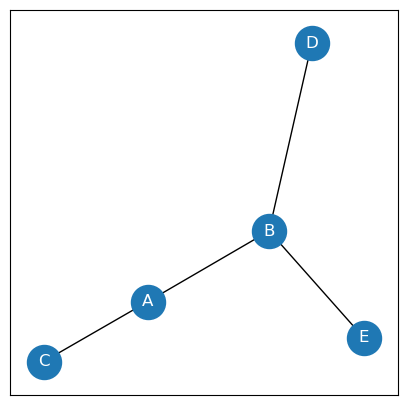

In [241]:
# undirected graph - connectivity - degree of particular node
plt.figure(figsize=(5,5))
Gobj1 = nx.Graph()
Gobj1.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E')])
print(nx.is_connected(Gobj1))
print(f"degree of node (A): {Gobj1.degree['A']}")
nx.draw_networkx(Gobj1,pos=nx.spring_layout(Gobj1,seed=0),node_size=600,font_size=12,font_color='white')

In-degree of node (A): 0
Out-degree of node (A): 2


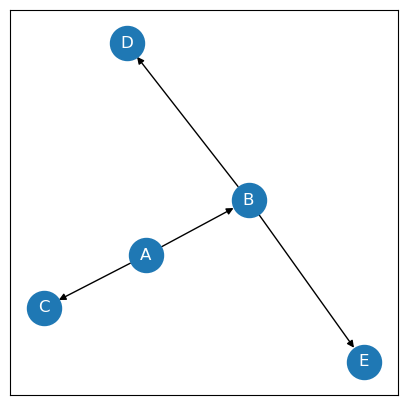

In [245]:
# directed graph -  degree of particular node
plt.figure(figsize=(5,5))
DGobj1 = nx.DiGraph()
DGobj1.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E')])
#print(nx.is_connected(DGobj1))
print(f"In-degree of node (A): {DGobj1.in_degree['A']}")
print(f"Out-degree of node (A): {DGobj1.out_degree['A']}")
nx.draw_networkx(DGobj1,pos=nx.spring_layout(DGobj1,seed=0),node_size=600,font_size=12,font_color='white')

In [247]:
print(f"In-degree of node (B): {DGobj1.in_degree['B']}")
print(f"Out-degree of node (B): {DGobj1.out_degree['B']}")

In-degree of node (B): 1
Out-degree of node (B): 2


In [ ]:
Breadth-First Search (BFS)
---------------------------
 |->graph traversal algorithm
 |->explore all the neighbors of node - each level 
 |->queue - keep all the visiting nodes 

 |->Shortest path
(City1) ---------- (City2)
  |                |
(City3)--------(City4)
 # adjacency list
City1 [0,City2,City3,0]
City2 [City1,0,0,City4]
..
initialize 
 - start node = 1 ->Queue -[1] ; visited - 1
next visiting node 1
    (from City1 neighbors City2,City3) //add to queue ->visited 
next visiting node 2

In [249]:
# bfs algorithm
G = nx.Graph()
G.add_edges_from([('A','B'),('A','C'),('B','D'),('B','E'),('C','F'),('C','G')])

def f1(graph,node):
    visited,queue = [node],[node]
    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

f1(G,'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [251]:
f1(G,'B')

['B', 'A', 'D', 'E', 'C', 'F', 'G']

In [253]:
f1(G,'E')

['E', 'B', 'A', 'D', 'C', 'F', 'G']

In [ ]:
in
not in 
######## membership operators

'pattern' in inputCollection ->True/False 
'pattern' not in inputCollection ->True/False 

In [255]:
'sales' in 'raj,sales,pune'

True

In [257]:
'sales' not in 'raj,sales,pune'

False

In [259]:
'prod' not in 'raj,sales,pune'

True

In [263]:
# To get list of nodes from graph 
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G'))

In [ ]:
# DFS - Depth-First Search
# backtracking 
# stack 

In [267]:
# dfs 
visited = []
def f1(visited,graph,node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = f1(visited,graph,neighbor)
    return visited

f1(visited,G,'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']

In [ ]:
# Data Collection ->networkx ->Graph() Vs DiGraph() ->add_edges()...
# feature engineering
#  |
# jaccard_coefficient

jaccard_coefficient - measures similarity between two sets //based on neighbors
         N(a) <intersection> N(b)   =>  | Size of a intersection b |
J(a,b)=  -----------------------         --------------------------
            N(a) <union> N(b)           |  Size a union b  |

In [269]:
A = {1,2,3,4}
B = {3,4,5,6}
A.intersection(B)

{3, 4}

In [271]:
A.union(B)

{1, 2, 3, 4, 5, 6}

In [273]:
2/6

0.3333333333333333

In [ ]:
# 33 % similarity 
J(A,B) = 1
J(A,B) = 0

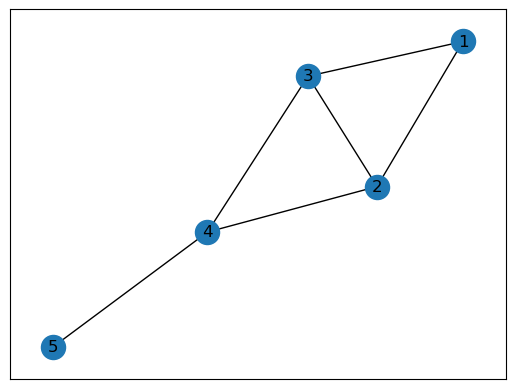

In [275]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(3,4),(4,5)])
nx.draw_networkx(G)

In [277]:
nx.common_neighbors(G,1,2)

<generator object common_neighbors.<locals>.<genexpr> at 0x0000020C9D9873D0>

In [279]:
list(nx.common_neighbors(G,1,2))

[3]

In [281]:
list(nx.common_neighbors(G,3,2))

[1, 4]

In [283]:
nx.jaccard_coefficient(G,[(1,2),(1,3),(2,3)])

<generator object _apply_prediction.<locals>.<genexpr> at 0x0000020C9AD8B040>

In [287]:
jaccard = nx.jaccard_coefficient(G,[(1,2),(1,3),(2,3)])
for n1,n2,p in jaccard:
    print(f'node1={n1} and node2={n2}: {p}')

node1=1 and node2=2: 0.25
node1=1 and node2=3: 0.25
node1=2 and node2=3: 0.5


In [ ]:
# load the data
# Graph structure 
# feature engineering - jaccard coefficient
# data labels
# model 
# prediction
# --------->deploy this model -> social networks, medical bilogical networks...

In [ ]:
person enquire about course  -> Friends  Teacher1 Teacher2 Brother Uncle 
                                 CS      Civil     Mech     CS     physics 
                                 --                        ---- 
Bagging - majority voting 
boosting 


In [289]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [291]:
nx.erdos_renyi_graph

<function networkx.generators.random_graphs.gnp_random_graph(n, p, seed=None, directed=False, *, backend=None, **backend_kwargs)>

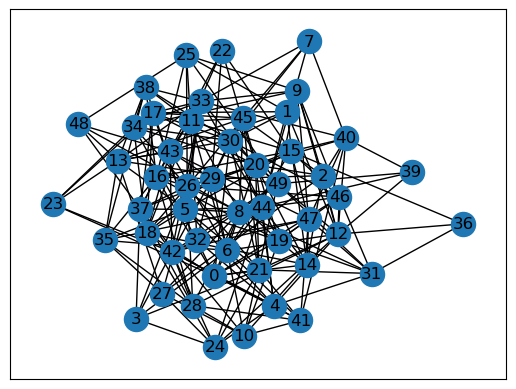

In [299]:
#help(nx.erdos_renyi_graph)
nx.draw_networkx(nx.erdos_renyi_graph(50,0.2))

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

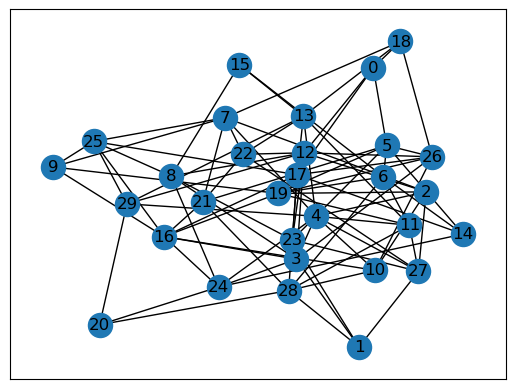

In [303]:
G = nx.erdos_renyi_graph(30,0.2) #  30 nodes ; prob of edge is 0.2
nx.draw_networkx(G)

In [ ]:
# load the data(Graph=(V,E))
# Get the features from nodes - apply random features - countable - describe property 
# Add node - features - dict add operation
# Assign label 
# X -> node features 
# Y -> node labels 
# train - split
# RandomForestClassifier ->classifier - number of trees 
# predict(inputTest) ->Y_prediction
# accuracy_score 

In [315]:
G = nx.erdos_renyi_graph(30,0.2) #  30 nodes ; prob of edge is 0.2
#nx.draw_networkx(G)

# Assign random features to the nodes
node_features = np.random.rand(len(G.nodes),5) # 5 features per node
node_features 

array([[0.39339322, 0.51570513, 0.30524253, 0.25677044, 0.41758912],
       [0.06982522, 0.79782876, 0.76696617, 0.82114377, 0.9743961 ],
       [0.22684369, 0.7750216 , 0.49818614, 0.1716223 , 0.11086101],
       [0.74497554, 0.13340293, 0.9059282 , 0.93559693, 0.92297993],
       [0.19128937, 0.49851397, 0.56879545, 0.91392144, 0.57401483],
       [0.50385584, 0.53703825, 0.03956467, 0.62086851, 0.45887261],
       [0.11655778, 0.45801055, 0.53487795, 0.6427282 , 0.71698879],
       [0.59997883, 0.61088413, 0.89847995, 0.52587903, 0.37344174],
       [0.56153042, 0.74776919, 0.1577839 , 0.25174478, 0.69878924],
       [0.40545281, 0.0105658 , 0.65454041, 0.41276056, 0.76673242],
       [0.0579409 , 0.74262381, 0.89960781, 0.52087267, 0.85740466],
       [0.61324592, 0.90792577, 0.16424073, 0.3032678 , 0.89845017],
       [0.7452374 , 0.85270158, 0.53846103, 0.11775662, 0.51595789],
       [0.67499895, 0.06962279, 0.35310266, 0.21876474, 0.92734885],
       [0.0483777 , 0.07124594, 0.

In [317]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [321]:
for var in enumerate('abc'):
    print(var)

(0, 'a')
(1, 'b')
(2, 'c')


In [323]:
for var in enumerate('abc',5):
    print(var)

(5, 'a')
(6, 'b')
(7, 'c')


In [325]:
for i,node in enumerate(G.nodes):
    G.nodes[node]['features'] = node_features[i]

In [333]:
# assign random label
node_labels = np.random.randint(0,2,size=len(G.nodes))

In [335]:
for i,node in enumerate(G.nodes):
    G.nodes[node]['label']=node_labels[i]

In [341]:
X = np.array([G.nodes[node]['features'] for node in G.nodes]) # node features
Y = np.array([G.nodes[node]['label'] for node in G.nodes]) # node labels 

In [343]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [345]:
classifier_obj = RandomForestClassifier(n_estimators=100,random_state=42)
classifier_obj.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [347]:
Y_pred = classifier_obj.predict(X_test)

In [349]:
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [351]:
accuracy_score(Y_test,Y_pred)

0.3333333333333333

In [ ]:
DeepWalk - Graph data
            GNN
 |
 |->Word2Vec
 |->randomwalks

Word2Vector - NLP
             -----

NLP
====
Appln ->Google Translate 

Input: Hello Good morning  --->output : French  ......

Text(word) ---> M/C -->10101 (vector)

1.corpus - paragraph 
2.documents - sentence 
3.vocabulary - unique words 

Tokenization

My name is karthik, i am teaching NLP.Also i likes to write code. //Corpus 

D1: My name is karthik, i am teaching NLP
D2: Also i likes to write code

unique words: 
S1: My name is karthik, i am teaching NLP
S2: Also likes to write code

My    name
|      |
01010  01010
|
stop words 
|
stemming - reducing root word (ex: history ->histori )
--------                                     ------//meaning is changed 
|
lemma (history ->history ; eating ->eat)
|
Good morning how are you


D1:  the food is good
D2:  the food is bad

[the food good bad ] <== unique words 

the =>  [ 1 0 0 0 
food      0 1 0 0
good      0 0 1 0
bad       0 0 0 1 ] //vector
|
Bag of word(BOW) + frequency   

[the food good bad]
n=2 -> the food  
n=3 -> the food good
n=4 -> the food good bad ===> 1 
..
n=N 
ngram

gensim

from gensim.models.word2vec import Word2Vec
model = Word2Vec([text],sg=1)
model.train([text],corputs_count)
model.wv[0] ->[101010]

the   food good bad
|       |   |    |___(n4)
(n1)  (n2)  (n3)

In [357]:
import nltk

In [359]:
# !pip install nltk

In [363]:
corpus = '''Hello welcome,to NLP learning.
please do activity the entire course module! to ab'c defg'''

In [365]:
from nltk.tokenize import sent_tokenize
sent_tokenize(corpus)

['Hello welcome,to NLP learning.',
 'please do activity the entire course module!',
 "to ab'c defg"]

In [369]:
from nltk.tokenize import word_tokenize
word_tokenize(corpus)

['Hello',
 'welcome',
 ',',
 'to',
 'NLP',
 'learning',
 '.',
 'please',
 'do',
 'activity',
 'the',
 'entire',
 'course',
 'module',
 '!',
 'to',
 'ab',
 "'",
 'c',
 'defg']

In [373]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(corpus)

['Hello',
 'welcome',
 ',',
 'to',
 'NLP',
 'learning',
 '.',
 'please',
 'do',
 'activity',
 'the',
 'entire',
 'course',
 'module',
 '!',
 'to',
 'ab',
 "'",
 'c',
 'defg']

In [375]:
words=['eating','eats','eaten','writing','writes','programming','programs','history','finally']

In [377]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
stemming.stem('history')

'histori'

In [379]:
for var in words:
    print(var+'------->'+stemming.stem(var))

eating------->eat
eats------->eat
eaten------->eaten
writing------->write
writes------->write
programming------->program
programs------->program
history------->histori
finally------->final


In [381]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('history')

'history'

In [387]:
for var in words:
    print(var+'------->'+lemmatizer.lemmatize(var))

eating------->eating
eats------->eats
eaten------->eaten
writing------->writing
writes------->writes
programming------->programming
programs------->program
history------->history
finally------->finally


In [389]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [391]:
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [397]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

voc = ['the','food','good','bad','ok']

label_obj = LabelEncoder()
label_encoded = label_obj.fit_transform(voc)

obj1 = OneHotEncoder(sparse_output=False)
label_encoded = label_encoded.reshape(len(label_encoded),1)
obj1.fit_transform(label_encoded)

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [399]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
s="the food is good"
words = word_tokenize(s)
ngrams(words,1) # n=1

In [401]:
list(ngrams(words,1)) # n=1

[('the',), ('food',), ('is',), ('good',)]

In [403]:
words = word_tokenize(s)
print(list(ngrams(words,1)))# n=1
print(list(ngrams(words,2)))# n=2
print(list(ngrams(words,3)))# n=3
print(list(ngrams(words,4)))# n=4
print(list(ngrams(words,5)))# n=5

[('the',), ('food',), ('is',), ('good',)]
[('the', 'food'), ('food', 'is'), ('is', 'good')]
[('the', 'food', 'is'), ('food', 'is', 'good')]
[('the', 'food', 'is', 'good')]
[]


In [ ]:
################################# END OF THE SESSION ###############################